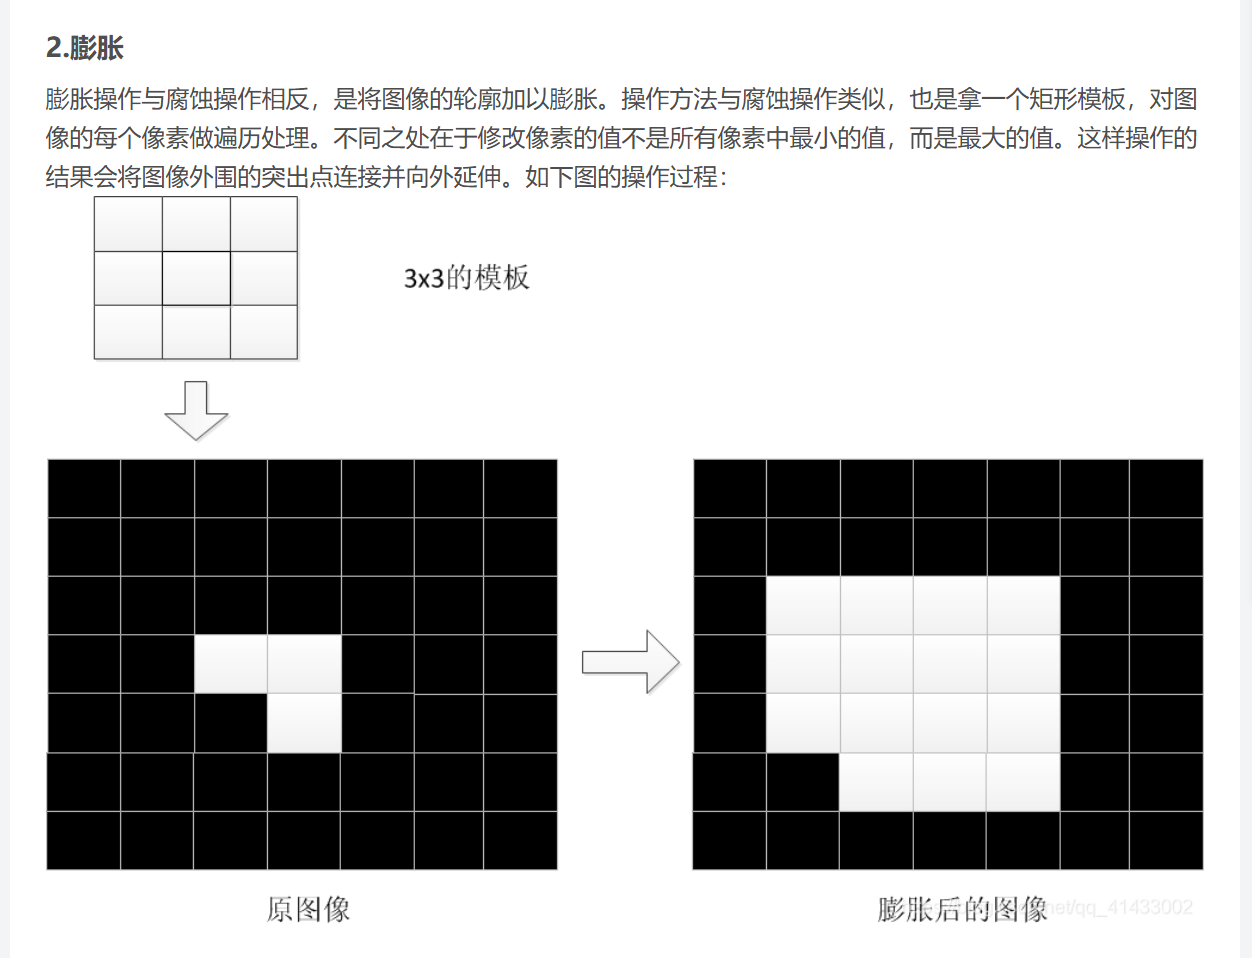
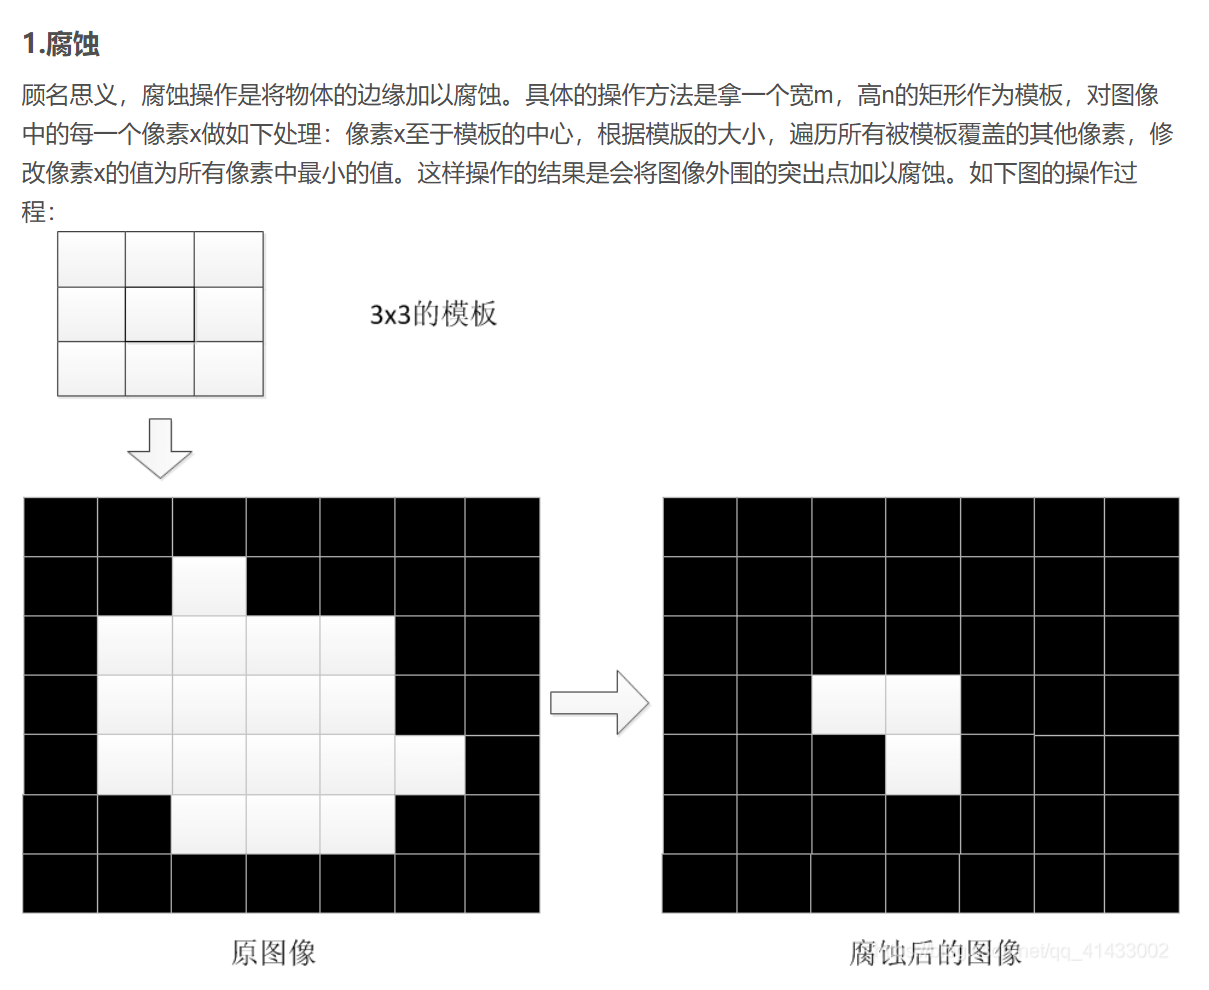

Histogram:


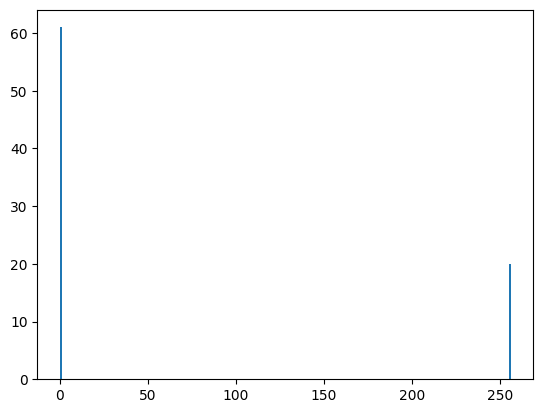

Smoothed Image:
[[113 113 170 113 113 113 170 113 113]
 [113  85 113  57  57  57 113  85 113]
 [170 113 142  57  57  57 142 113 170]
 [170  85  85   0   0   0  85  85 170]
 [170  85  85   0   0   0  85  85 170]
 [170 113 142  57  57  57 142 113 170]
 [113  85 113  57  57  57 113  85 113]
 [ 57  57  85  57  57  57  85  57  57]
 [  0   0   0   0   0   0   0   0   0]]
Sharpened Image:
[[  0   0   0   0   0   0   0   0   0]
 [  0 255 255 255   0 255 255 255   0]
 [  0 255   0   0   0   0   0 255   0]
 [  0 255   0   0   0   0   0 255   0]
 [  0 255   0   0   0   0   0 255   0]
 [  0 255   0   0   0   0   0 255   0]
 [  0 255 255 255   0 255 255 255   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]]
Dilated Image:
[[255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255]
 [255 255 255   0   0   0 255 255 255]
 [255 255 255   0   0   0 255 255 255]
 [255 255 255 255 255 255 255 255 255]
 [255 255 255 

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# 创建一个9x9的二值图像矩阵
image = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 255, 255, 255, 0],
    [0, 255, 0, 0, 0, 0, 0, 255, 0],
    [0, 255, 0, 0, 0, 0, 0, 255, 0],
    [0, 255, 0, 0, 0, 0, 0, 255, 0],
    [0, 255, 0, 0, 0, 0, 0, 255, 0],
    [0, 255, 255, 255, 0, 255, 255, 255, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0]
], dtype=np.uint8)

# 计算直方图
histogram = cv2.calcHist([image], [0], None, [256], [0,256])

# 平滑操作
kernel = np.ones((3,3), np.float32) / 9
smoothed_image = cv2.filter2D(image, -1, kernel)

# 锐化操作
laplacian_kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
], dtype=np.float32)
sharpened_image = cv2.filter2D(image, -1, laplacian_kernel)

# 形态学操作：膨胀和腐蚀
kernel = np.ones((3,3), np.uint8)
dilated_image = cv2.dilate(image, kernel, iterations=1)
eroded_image = cv2.erode(image, kernel, iterations=1)

# 打印输出结果
print("Histogram:")
plt.hist(image.ravel(), 256, [0, 256])
plt.show()

print("Smoothed Image:")
print(smoothed_image)

print("Sharpened Image:")
print(sharpened_image)

print("Dilated Image:")
print(dilated_image)

print("Eroded Image:")
print(eroded_image)
